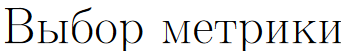

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale
import numpy as np
from sklearn.model_selection import cross_val_score

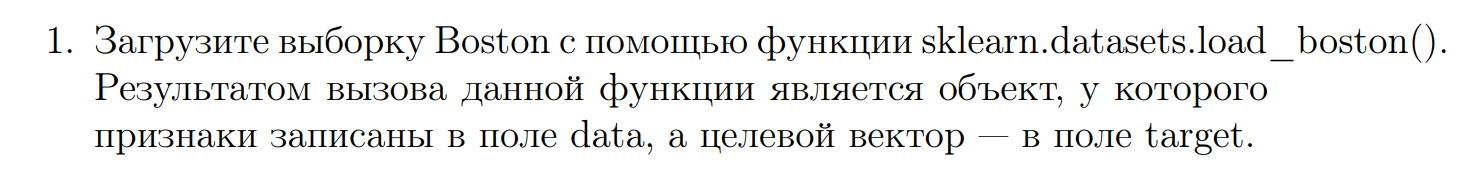

In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

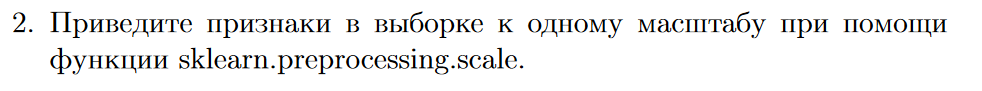

In [5]:
X_scaled = scale(X)# масштабирование признаков

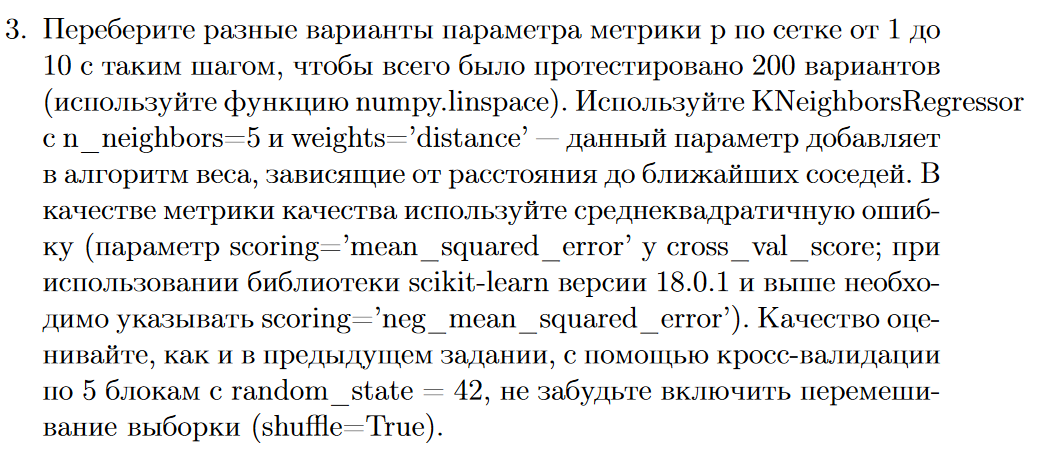

In [7]:
p_values = np.linspace(1, 10, 200) # 200 вариантов по сетке от 1 до 10
all_mse = [] # хранение ошибок

for p in p_values:
    knn = KNeighborsRegressor(n_neighbors=5, weights='distance', p=p)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_err = np.mean(scores)
    all_mse.append(mean_err)

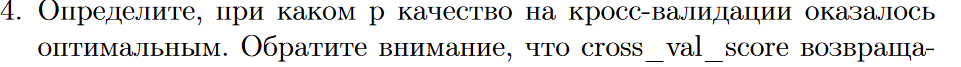
##### 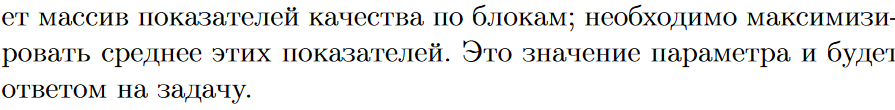

In [9]:
p = np.argmax(all_mse)
print(f'При p={round(p_values[p])} качество на кросс-валидации оказалось оптимальным.')

При p=1 качество на кросс-валидации оказалось оптимальным.
